In [47]:
using Interact
using Gadfly

In [11]:
set_default_plot_size(25cm,10cm)

_________

# Chapter 4 - Optimization

<br>

## 1. Grid Search

>### Exercise 8

Assume that tax revenue for a government is given by $R(t) = −t^2 + t$, where $t$ is a tax rate. Use the grid search method and find the percentage tax rate that maximizes tax revenue up to $10^{−2}$ precision.

_________

In [44]:
function ex8_GridSearch()
    
    R(t) = -t^2+t

    t = 0:10.0^(-2):1
    y = R.(t)
       
    results = ["t" "R(t)"; y R.(y)]
    solution = ["t*" "R(t*)"; t[find(y .== maximum(y))][1] maximum(y)]
    
    p = plot(
        layer(x=t, y=y, Geom.point, Theme(default_color=colorant"blue"), order=3),
        layer(x=[solution[2,1] solution[2,1]], y=[0 solution[2,2]], Geom.line, Theme(default_color=colorant"red"), order=2),
        layer(x=[0 1], y=[0 0], Geom.line, Theme(default_color=colorant"black"),order=0),
        Coord.Cartesian(xmin=0,xmax=1)
    )

    return results, solution, p
end;

In [45]:
ex8_GridSearch()[2]

2×2 Array{Any,2}:
  "t*"   "R(t*)"
 0.5    0.25    

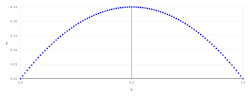

In [46]:
ex8_GridSearch()[3]

__________________

## 2. Golden Search

>### Exercise 9.

Let f be a real valued function such that $f(x) = xcos(x^2)$. Find the maximum of the function using the golden search rule in the interval $[0,3]$, up to $10^{−10}$ precision.

_________

In [6]:
function ex9_GoldenSearch(x0)
    
    a = 0; b = 3; tol = 10.0^(-10)
    f(x) = x*cos(x^2)
    
    
    
    path = [x0 0; x0 f(x0)]
    results = ["iter" "x" "cos(x)"]
    iter = 0
    
    for i in 1:100
        x0 = f(x0); iter += 1
        results = [results; iter x0 cos(x0)]
        path = [path; x0 x0; x0 f(x0)]
    end
    
    x = (-pi/2):0.01:(pi/2)
    p = plot(
        layer(x=[x[1] x[length(x)]], y=[0 0], Geom.line, Theme(default_color=colorant"black"),order=0),        
        layer(x=x, y=f.(x), Geom.line, Theme(default_color=colorant"blue"), order=1),
        layer(x=x, y=x, Geom.line, Theme(default_color=colorant"green"), order=2),
        layer(x=path[:,1], y=path[:,2], Geom.line(preserve_order=true), Theme(default_color=colorant"red"), order=3),
        Coord.Cartesian(xmin=x[1],xmax=x[length(x)],ymin=0,ymax=1)
    )
        
    return results, [results[1:4,:]; results[(size(results)[1]-2):size(results)[1],:]], p
end;

In [7]:
ex6_FixedPoint(1)[2]

7×3 Array{Any,2}:
    "iter"   "x"       "cos(x)"
   1.0      0.540302  0.857553 
   2.0      0.857553  0.65429  
   3.0      0.65429   0.79348  
  98.0      0.739085  0.739085 
  99.0      0.739085  0.739085 
 100.0      0.739085  0.739085 

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.0 Float64 , "x_0", 0.0, "0.0", 16, Interact.OptionDict(DataStructures.OrderedDict("-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1,"-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7"…)), Any[], Any[], true, "horizontal", true)

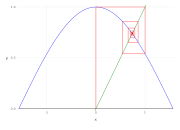

In [8]:
set_default_plot_size(18cm,13cm)

@manipulate for x_0 in (-1.5):0.1:(1.5)
    ex6_FixedPoint(x_0)[3]
end

__________

## 3. Newton-Rhapson

>### Exercise 7.

Let $f(x) = 1 − 0.5x^{−0.5} − 0.3x^{−0.2}$. Find $x$: $f(x) = 0$.

_________

In [9]:
function ex7_NewtonRhapson(x0)
    
    f(x) = 1-0.5x^(-0.5)-0.3x^(-0.2)
    
    h = 10.0^(-15)
    df(x) = (f(x0+h)-f(x0-h))/(2h)
    
    iter = 1
    path = [x0 0; x0 f(x0)]
    results = ["iter" "x" "f(x)"; iter x0 f(x0)]
    
    while iter <=1000 && abs(f(x0))>h
        path = [path; (x0 - f(x0)/df(x0)) f(x0)]
        x0 = x0 - f(x0)/df(x0); iter += 1
        path = [path; x0 f(x0)]
        results = [results; iter x0 f(x0)]
    end
   
    x = 0.2:0.01:1.4
    p = plot(
        layer(x=[x[1] x[length(x)]], y=[0 0], Geom.line, Theme(default_color=colorant"black"),order=0),        
        layer(x=x, y=f.(x), Geom.line, Theme(default_color=colorant"blue"), order=1),
        layer(x=path[:,1], y=path[:,2], Geom.line(preserve_order=true), Theme(default_color=colorant"red"), order=3),
        Coord.Cartesian(xmin=x[1],xmax=x[length(x)])
    )
        
    return results, [results[1:4,:]; results[(size(results)[1]-2):size(results)[1],:]], p
end;

In [10]:
ex7_NewtonRhapson(1)[2]

7×3 Array{Any,2}:
   "iter"   "x"        "f(x)"    
  1.0      1.0        0.2        
  2.0      0.279424  -0.333025   
  3.0      0.44607   -0.101199   
  9.0      0.567094  -7.9875e-13 
 10.0      0.567094   1.14908e-14
 11.0      0.567094   3.88578e-16

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 0.7 Float64 , "x0", 0.7, "0.7", 6, Interact.OptionDict(DataStructures.OrderedDict("0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9,"1.0"=>1.0,"1.1"=>1.1…), Dict(0.6=>"0.6",0.3=>"0.3",1.2=>"1.2",0.7=>"0.7",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.4=>"0.4",1.1=>"1.1"…)), Any[], Any[], true, "horizontal", true)

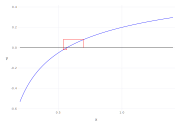

In [11]:
@manipulate for x0 in 0.2:0.1:1.3
    ex7_NewtonRhapson(x0)[3]
end

<br>